# Pruebas de detectar casillas con función 'findContours'

In [1]:
from aux_funcs import split_pages, preprocess_img, find_cboxes_img, draw_boxes, is_valid_box
dpi = 300

### Transformar pdf a png

In [2]:
file_filled = '../multiple_choice_example/filled/filled_33333.pdf'
file_scanned = '../multiple_choice_example/scanned/scanned_11111.pdf'

In [3]:
split_pages(file_filled, 'mchoice_filled')
split_pages(file_scanned, 'mchoice_scanned')

In [4]:
filled_pages = ["png/mchoice_filled_page%s.png" % i for i in range(3)]
scanned_pages = ["png/mchoice_scanned_page%s.png" % i for i in range(3)]

### Preprocesamiento

pruebas con distintos métodos para mejorar la detección de las casillas, con la nueva función: findContours

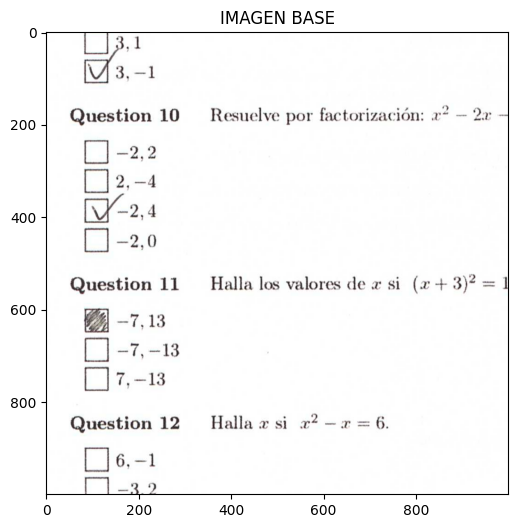

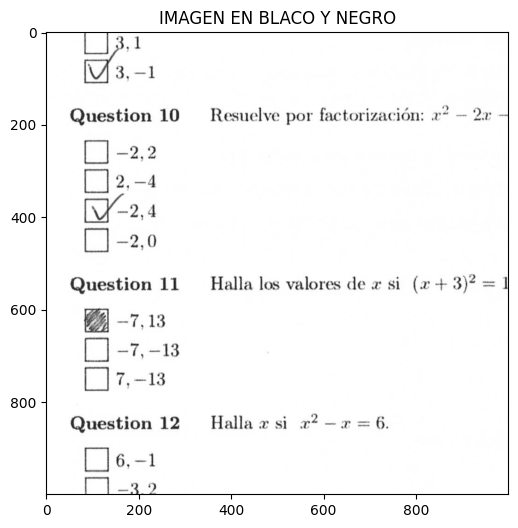

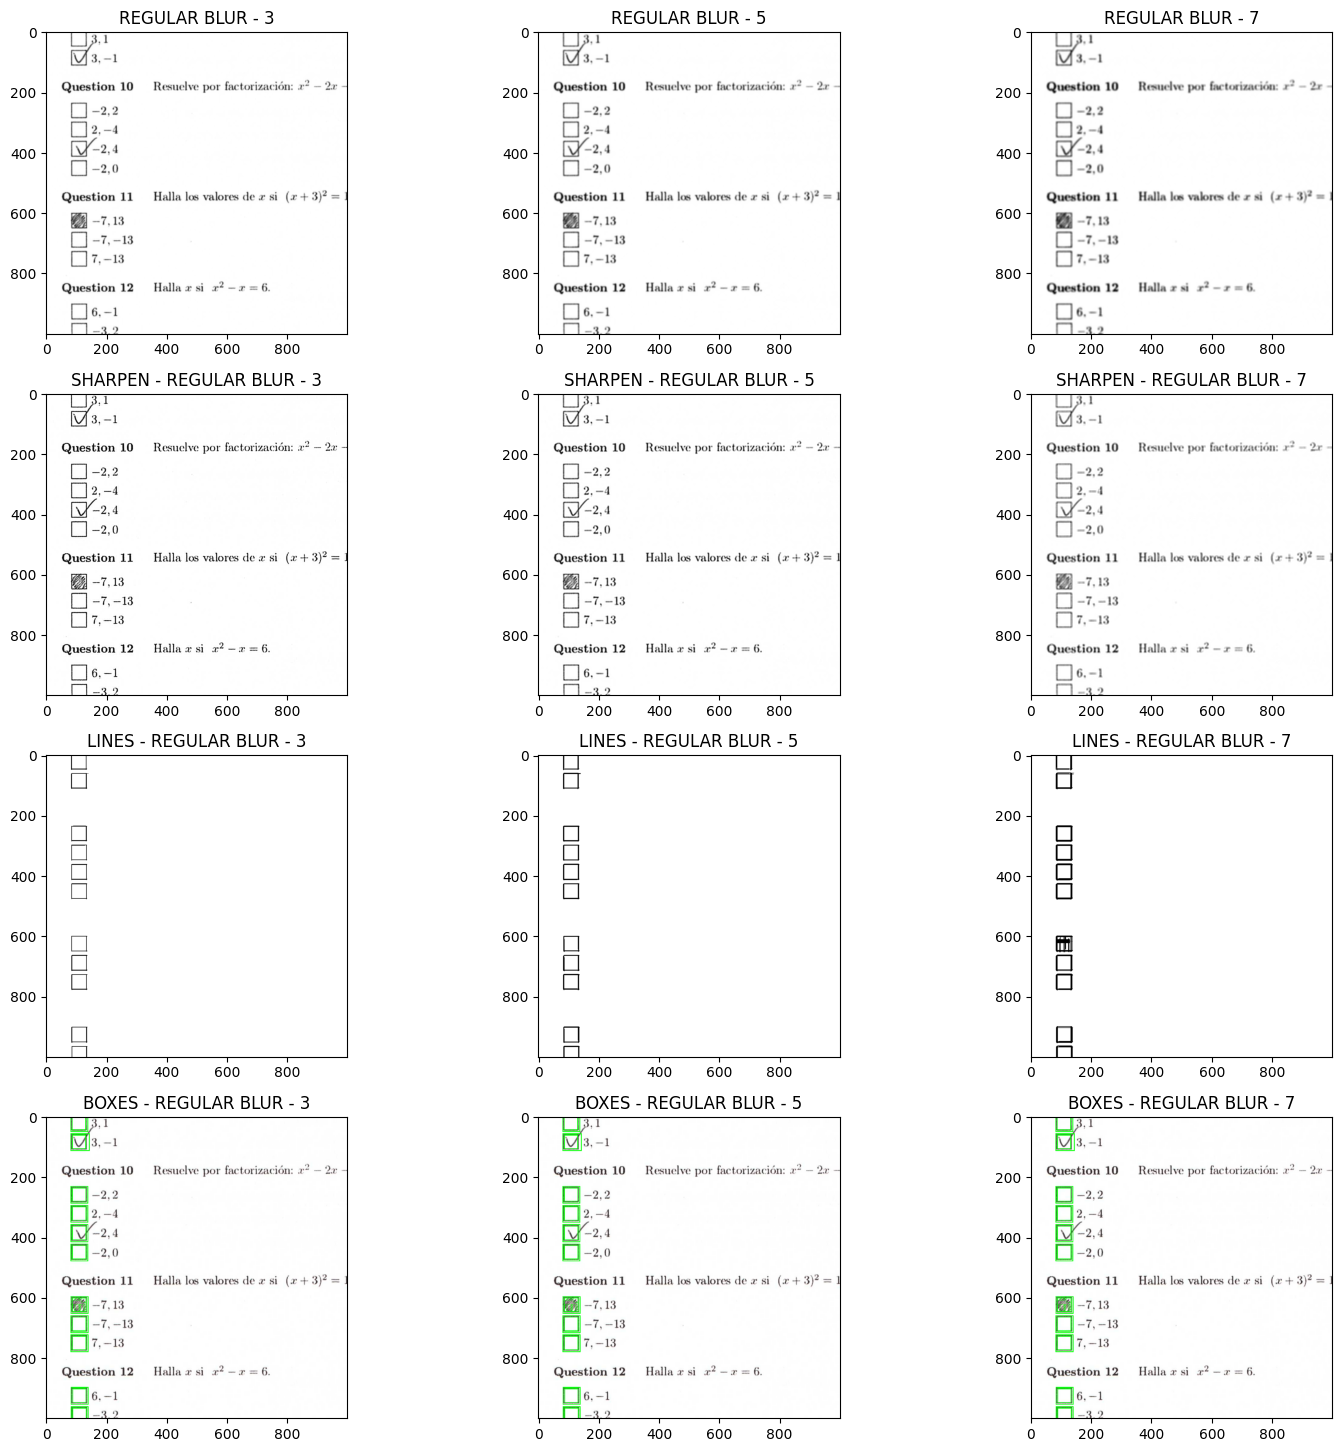

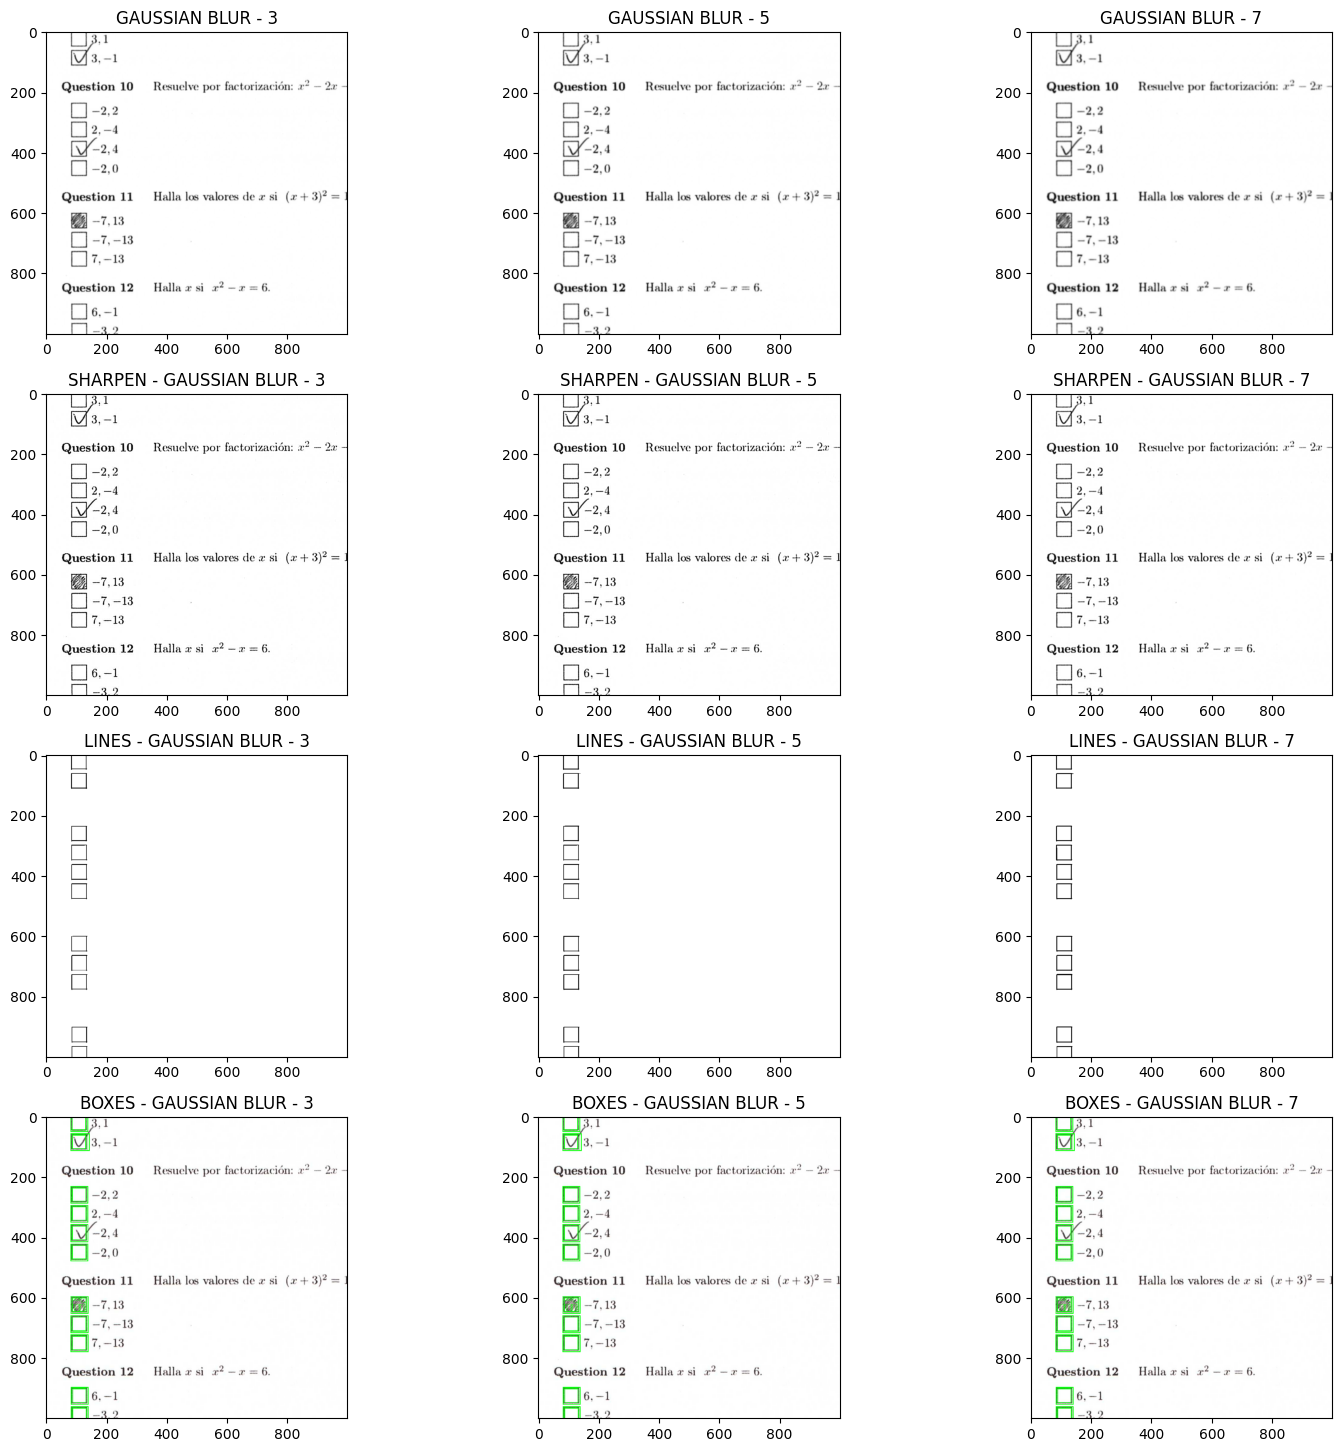

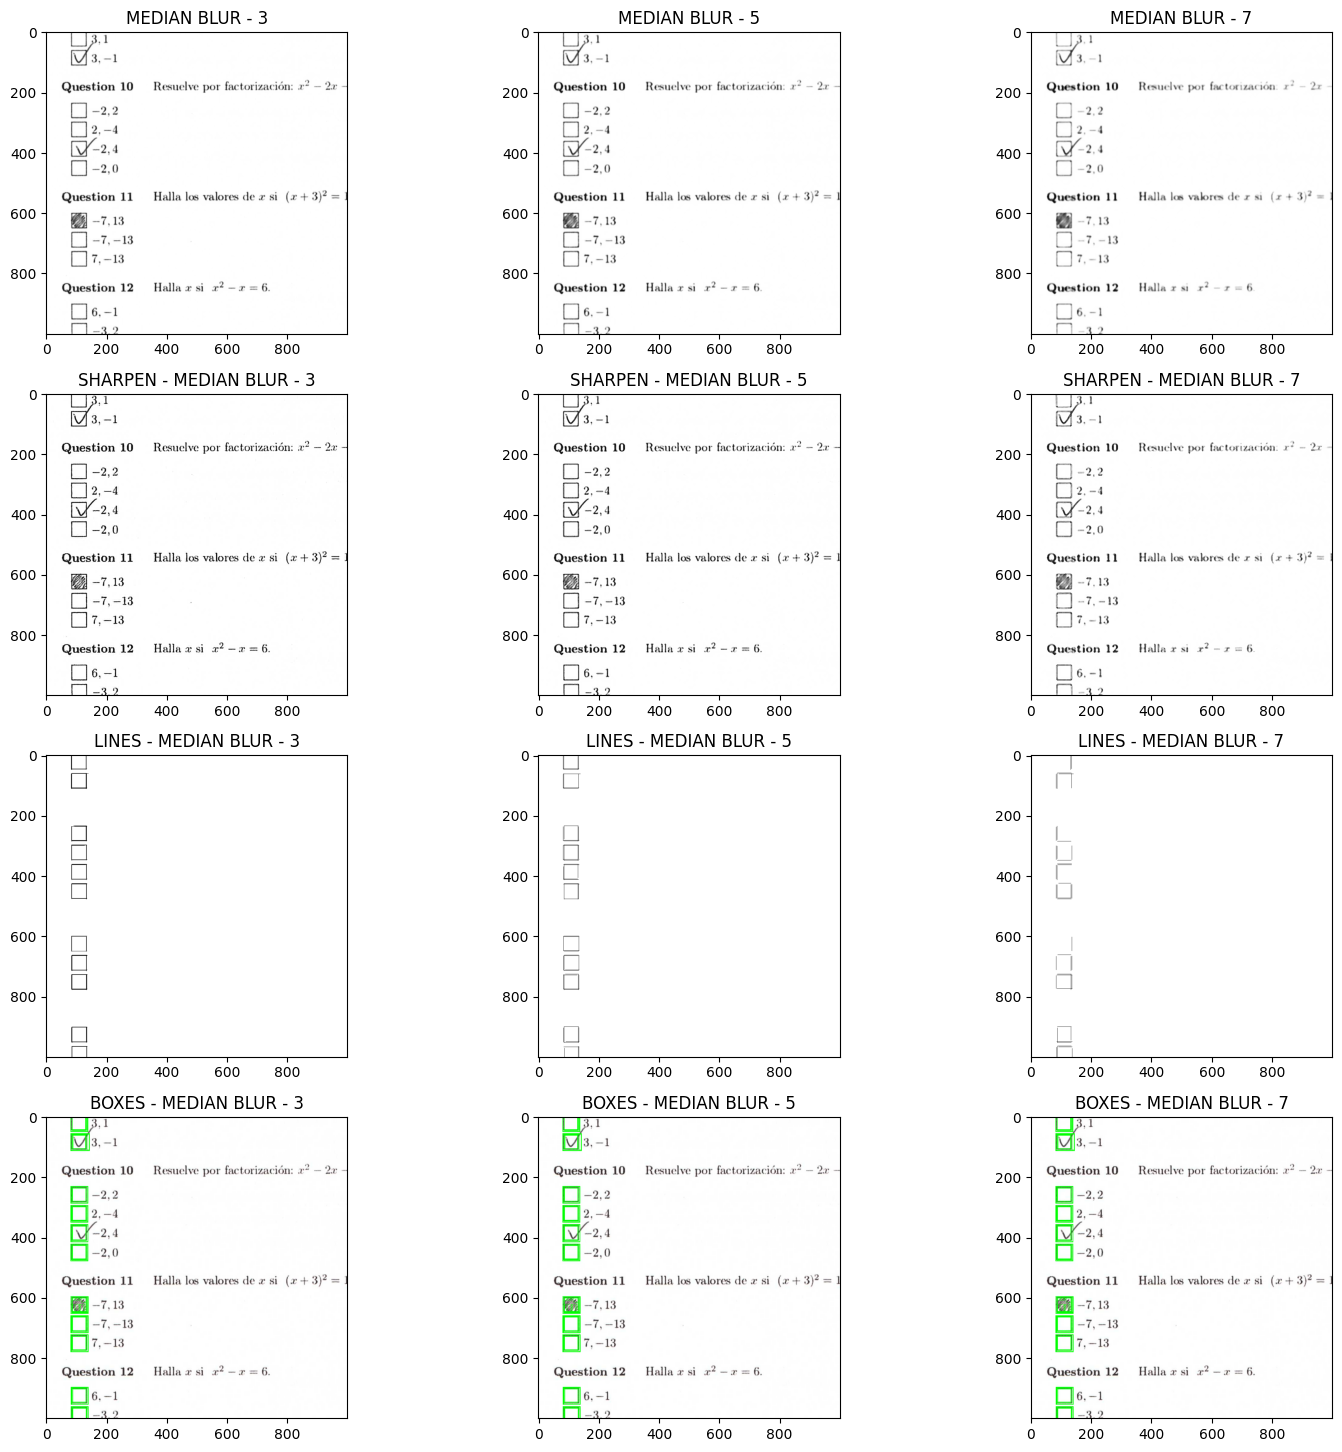

In [5]:
preprocess_img(scanned_pages[1])

### Búsqueda de casillas dentro de cada página

Búsco con el método las casillas de toda la página, tengo que descartar los contornos que no son casillas

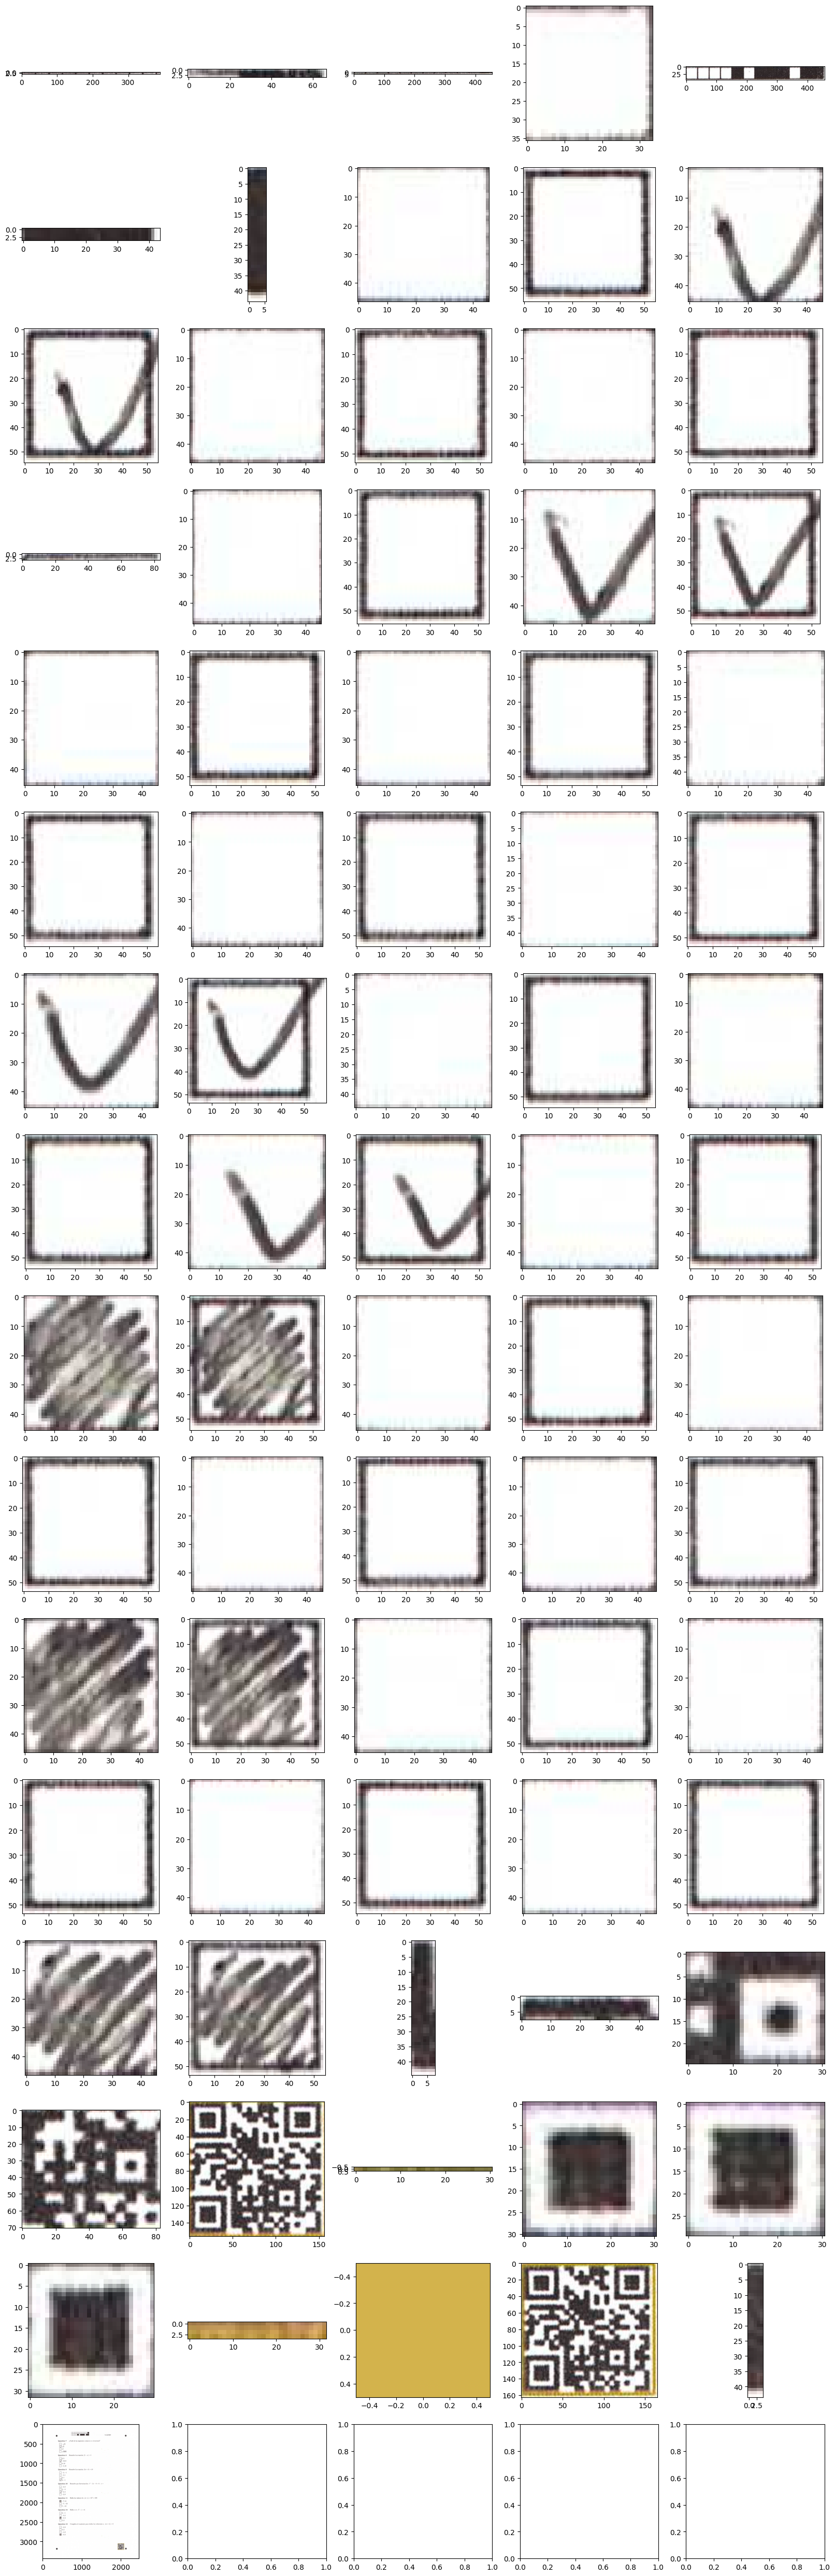

In [6]:
contornos = find_cboxes_img(scanned_pages[1])
draw_boxes(scanned_pages[1], contornos)

filtrar contornos encontrados en casillas o no

In [7]:
boxes = []
for (x, y, w, h) in contornos:
    if is_valid_box(x, y, w, h, boxes):
        boxes.append([x, y, w, h])

dibujar las casillas finales

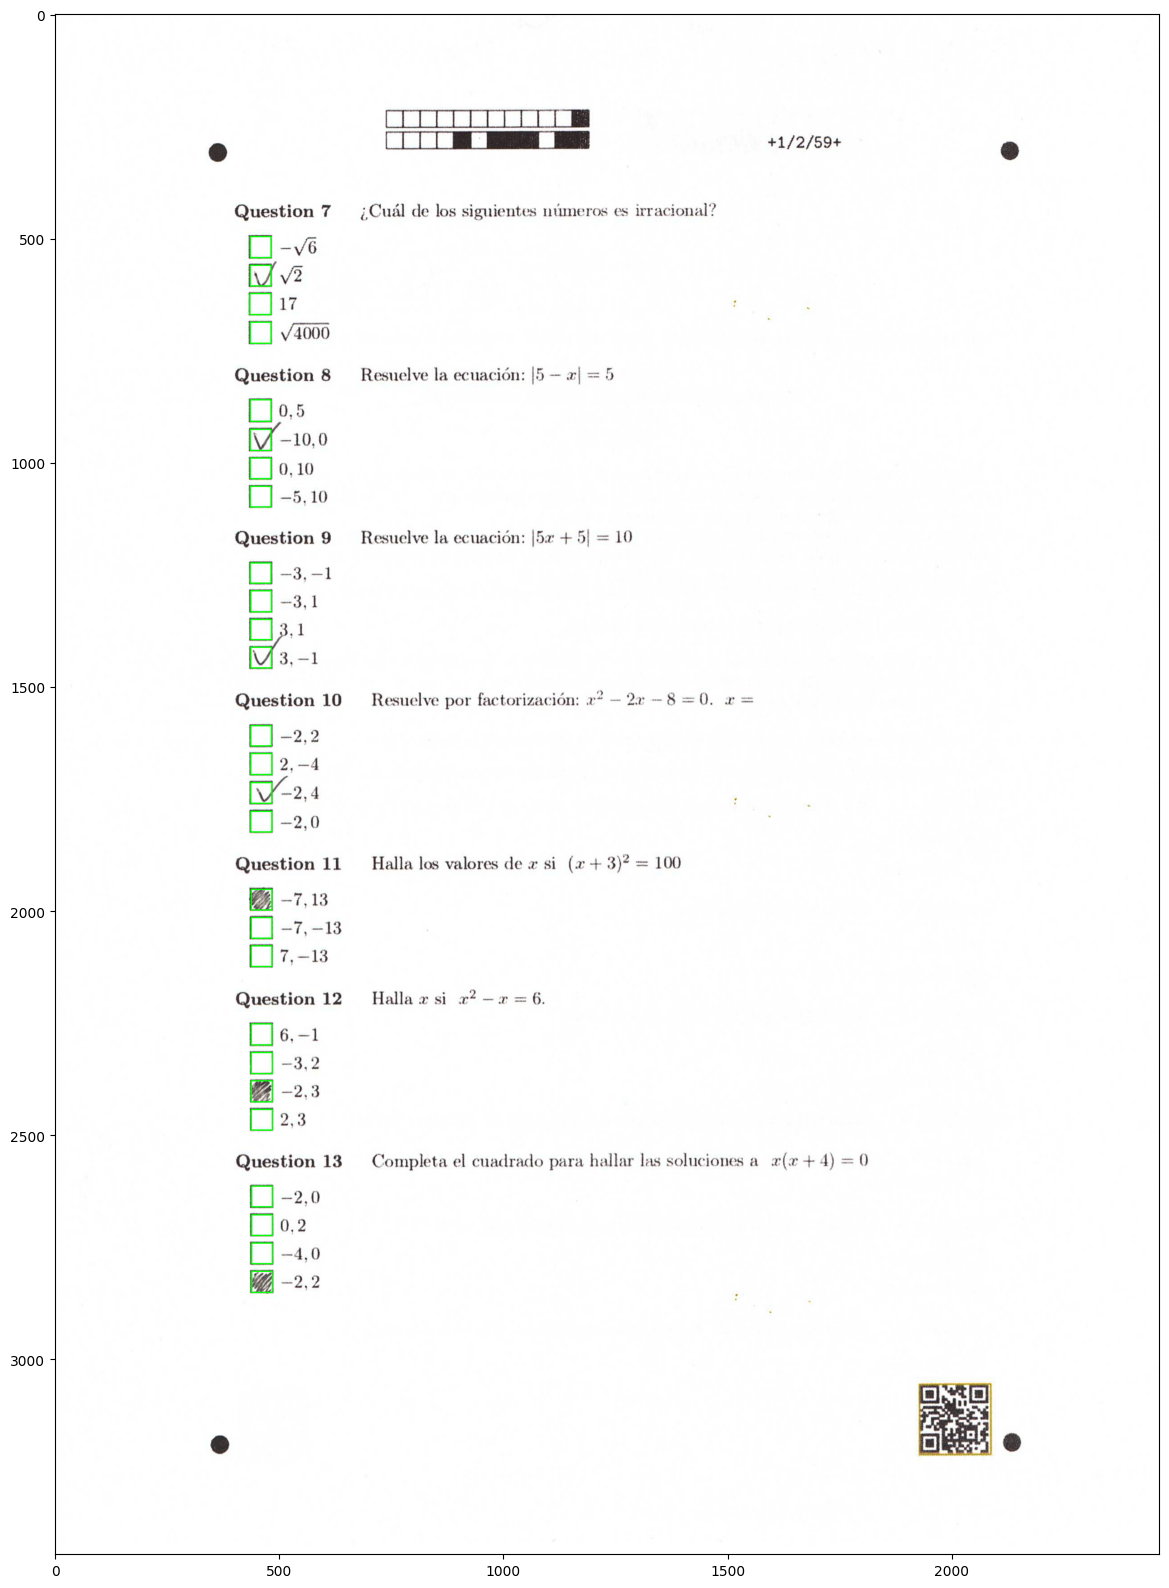

In [9]:
import cv2, matplotlib.pyplot as plt
img = cv2.imread(scanned_pages[1])

for (x, y, w, h) in boxes:
    cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

plt.figure(figsize=(20,20))
plt.imshow(img)